In [247]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [179]:
data_path = "../data/imagenet_r50"
model_exts = ["adv_train", "train"]
data_files = ['class_dims_pca_test', 'class_dims_2nn_test', 'classwise_acc_e0.0', 'classwise_acc_e2.0', 'classwise_acc_e3.-']

def load_data(model_ext, data_ext):
    with open(f"{data_path}_{model_ext}/{data_ext}.pkl", "rb") as f:
        return pickle.load(f)
    
std_class_acc_e0 = load_data("train", "classwise_acc_e0.0")
adv_class_acc_e0 = load_data("adv_train", "classwise_acc_e0.0")
std_class_acc_e2 = load_data("train", "classwise_acc_e2.0")
adv_class_acc_e2 = load_data("adv_train", "classwise_acc_e2.0")
std_class_acc_e3 = load_data("train", "classwise_acc_e3.0")
adv_class_acc_e3 = load_data("adv_train", "classwise_acc_e3.0")

std_class_dims_2nn = load_data("train", "class_dims_2nn_test")
adv_class_dims_2nn = load_data("adv_train", "class_dims_2nn_test")
std_class_dims_pca = load_data("train", "class_dims_pca_test")
adv_class_dims_pca = load_data("adv_train", "class_dims_pca_test")


In [188]:
std_r50 = pd.DataFrame(index=np.arange(1000), columns=["class_dims_2nn", "class_dims_pca", "e0_acc", "e2_acc", "e3_acc"])
adv_r50 = std_r50.copy()

std_r50["class_dims_2nn"] = std_class_dims_2nn
std_r50["class_dims_pca"] = std_class_dims_pca
std_r50["e0_acc"] = std_class_acc_e0
std_r50["e2_acc"] = std_class_acc_e2
std_r50["e3_acc"] = std_class_acc_e3

adv_r50["class_dims_2nn"] = adv_class_dims_2nn
adv_r50["class_dims_pca"] = adv_class_dims_pca
adv_r50["e0_acc"] = adv_class_acc_e0
adv_r50["e2_acc"] = adv_class_acc_e2
adv_r50["e3_acc"] = adv_class_acc_e3

adv_r50



,class_dims_2nn,class_dims_pca,e0_acc,e2_acc,e3_acc
0,9.118735,20,0.92,0.84,0.74
1,17.993768,19,0.86,0.70,0.68
2,11.041123,17,0.68,0.60,0.52
3,8.637968,16,0.60,0.52,0.46
4,6.515916,15,0.62,0.52,0.42
...,...,...,...,...,...
995,11.281894,16,1.00,1.00,0.96
996,10.146167,16,0.78,0.64,0.50
997,12.126175,21,0.62,0.48,0.36
998,10.514164,21,0.48,0.30,0.24


In [189]:
grouped_df = pd.DataFrame(index=np.arange(2000), columns=["model", "class_dims_2nn", "class_dims_pca", "e0_acc", "e2_acc", "e3_acc"])
grouped_df["model"] = ["std"]*1000 + ["adv"]*1000

grouped_df.loc[:999, "class_dims_2nn"] = list(std_r50["class_dims_2nn"])
grouped_df.loc[:999, "class_dims_pca"] = list(std_r50["class_dims_pca"])
grouped_df.loc[:999, "e0_acc"] = list(std_r50["e0_acc"])
grouped_df.loc[:999, "e2_acc"] = list(std_r50["e2_acc"])
grouped_df.loc[:999, "e3_acc"] = list(std_r50["e3_acc"])

grouped_df.loc[1000:, "class_dims_2nn"] = list(adv_r50["class_dims_2nn"])
grouped_df.loc[1000:, "class_dims_pca"] = list(adv_r50["class_dims_pca"])
grouped_df.loc[1000:, "e0_acc"] = list(adv_r50["e0_acc"])
grouped_df.loc[1000:, "e2_acc"] = list(adv_r50["e2_acc"])
grouped_df.loc[1000:, "e3_acc"] = list(adv_r50["e3_acc"])


In [191]:
plot1_df = grouped_df.melt(id_vars=['model', 'class_dims_2nn', 'class_dims_pca'], value_vars=['e0_acc', 'e2_acc', 'e3_acc'], 
                    var_name='epsilon', value_name='accuracy')
plot1_df["epsilon"] = plot1_df["epsilon"].apply(lambda x: x.split("_")[0])
plot1_df["epsilon"] = plot1_df["epsilon"].apply(lambda x: x[1:])
plot1_df
plot1_df['model'] = plot1_df['model'].apply(lambda x: "Standard Training" if x == "std" else "Adversarially Trained")

In [192]:
plot1_df

,model,class_dims_2nn,class_dims_pca,epsilon,accuracy
0,Standard Training,14.714004,24,0,0.96
1,Standard Training,24.998938,27,0,0.96
2,Standard Training,21.816692,25,0,0.82
3,Standard Training,21.075342,27,0,0.9
4,Standard Training,19.73659,23,0,0.92
...,...,...,...,...,...
5995,Adversarially Trained,11.281894,16,3,0.96
5996,Adversarially Trained,10.146167,16,3,0.5
5997,Adversarially Trained,12.126175,21,3,0.36
5998,Adversarially Trained,10.514164,21,3,0.24


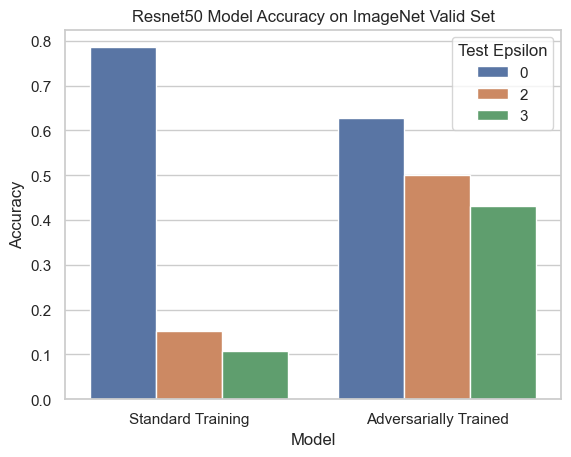

In [194]:
# grouped bar plot for accuracies

sns.set_theme(style="whitegrid")
# plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='accuracy', hue='epsilon', data=plot1_df, errorbar=None)
plt.title('Resnet50 Model Accuracy on ImageNet Valid Set')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend(title='Test Epsilon')
plt.show()

In [249]:
from matplotlib.ticker import MultipleLocator

def plot_acc_vs_dims_subplots(df, eps, model_name='Standard'):
  sns.set_theme(style="whitegrid")
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  sns.scatterplot(x=f'e{eps}_acc', y='class_dims_2nn', data=df, ax=axs[0])
  # axs[0].set_title('2NN Class Dimensionality vs. Accuracy')
  axs[0].set_xlabel('Classwise Accuracy')
  axs[0].set_ylabel('2NN Class Dimensionality')
  # axs[0].yaxis.set_major_locator(MultipleLocator(2))

  sns.scatterplot(x=f'e{eps}_acc', y='class_dims_pca', data=df, ax=axs[1])
  # axs[1].set_title('PCA Class Dimensionality vs. Accuracy')
  axs[1].set_xlabel('Classwise Accuracy')
  axs[1].set_ylabel('PCA Class Dimensionality')
  
  # axs[1].yaxis.set_major_locator(MultipleLocator(1))
  # set y axis step size

  fig.suptitle(f'{model_name} Resnet50 Model Accuracy vs. Class Dimensionality (Epsilon={eps})')
  # plt.show()

  # pearson
  pearson_2nn = pearsonr(df[f'e{eps}_acc'], df['class_dims_2nn'])
  pearson_pca = pearsonr(df[f'e{eps}_acc'], df['class_dims_pca'])
  return fig, axs, pearson_2nn, pearson_pca

### Standard Training Model Plots (class acc vs class dims)

Pearson Correlation Coefficient for 2NN: 0.064
Pearson Correlation Coefficient for PCA: -0.447


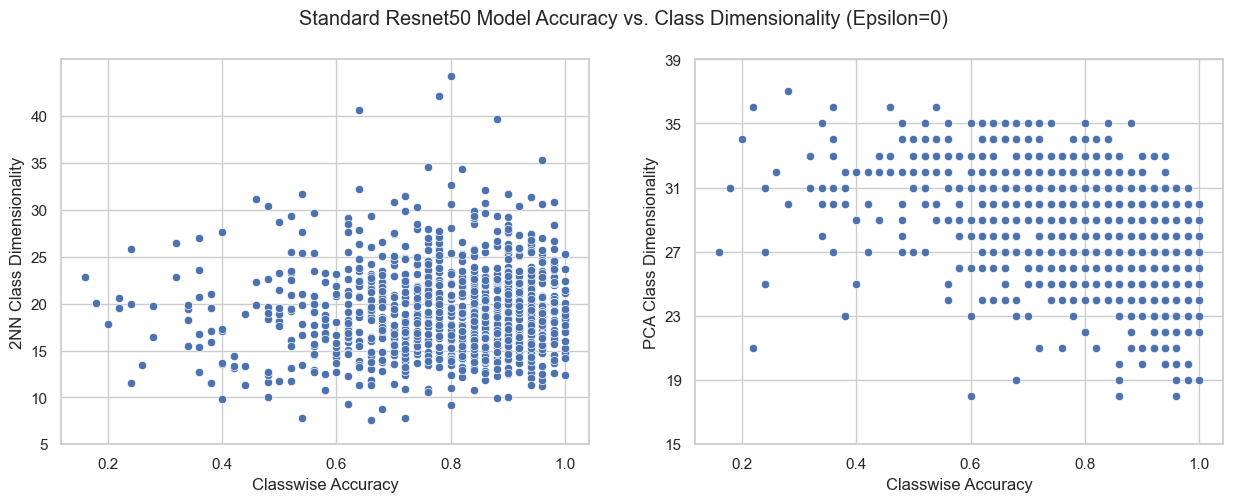

In [255]:
# two subplots for classwise accuracy e0 vs cam dims (one for 2nn and one for pca)
fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(std_r50, eps=0, model_name='Standard')

axs[0].set_yticks(np.arange(5, 45, 5))
axs[1].set_yticks(np.arange(15, 40, 4))

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")
plt.show()

Pearson Correlation Coefficient for 2NN: -0.011
Pearson Correlation Coefficient for PCA: -0.623


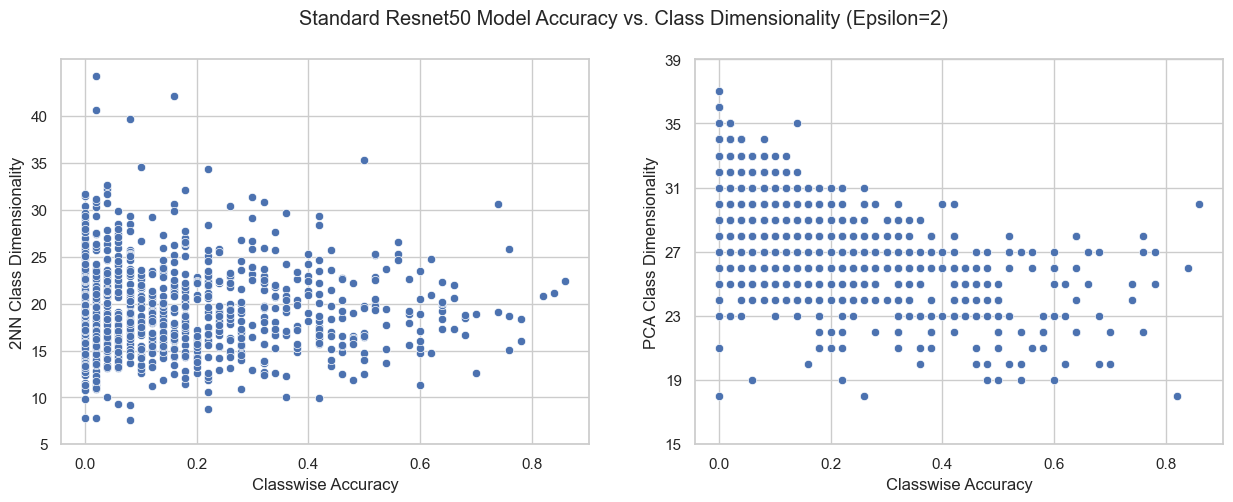

In [258]:
# e2 acc std model
fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(std_r50, eps=2, model_name='Standard')

axs[0].set_yticks(np.arange(5, 45, 5))
axs[1].set_yticks(np.arange(15, 40, 4))

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")

plt.show()


Pearson Correlation Coefficient for 2NN: -0.006
Pearson Correlation Coefficient for PCA: -0.603


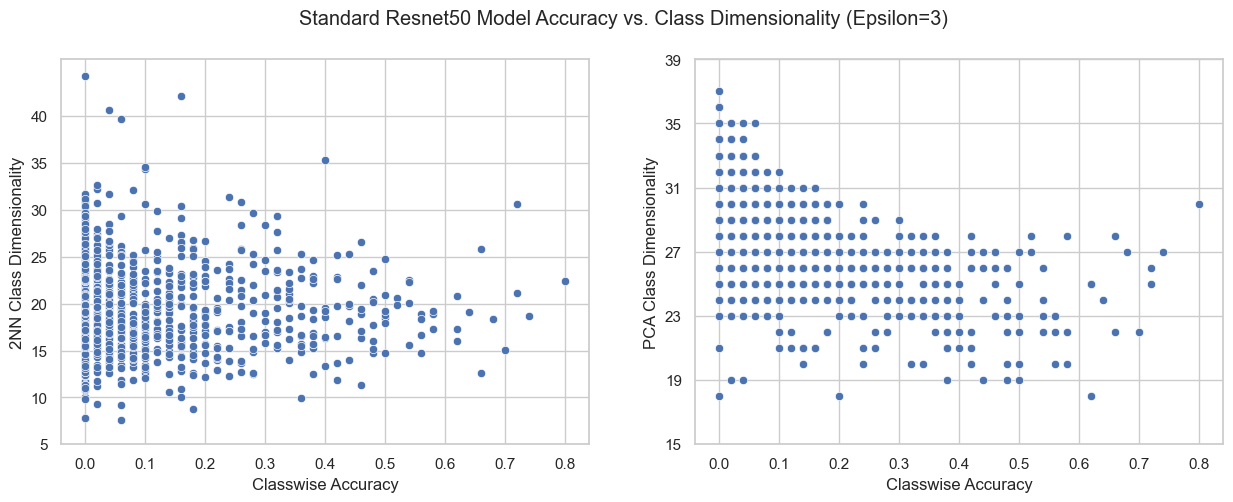

In [259]:
# e3 acc std model
fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(std_r50, eps=3, model_name='Standard')

axs[0].set_yticks(np.arange(5, 45, 5))
axs[1].set_yticks(np.arange(15, 40, 4))

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")


#### Further processing the data -- averaging over all cam dims for same accuracy score

In [266]:
processed_std_r50 = std_r50.copy()

# avg all class dims for same accuracy
processed_std_r50_e0 = processed_std_r50.groupby(['e0_acc']).mean().reset_index()
processed_std_r50_e2 = processed_std_r50.groupby(['e2_acc']).mean().reset_index()
processed_std_r50_e3 = processed_std_r50.groupby(['e3_acc']).mean().reset_index()


Pearson Correlation Coefficient for 2NN: 0.124
Pearson Correlation Coefficient for PCA: -0.639


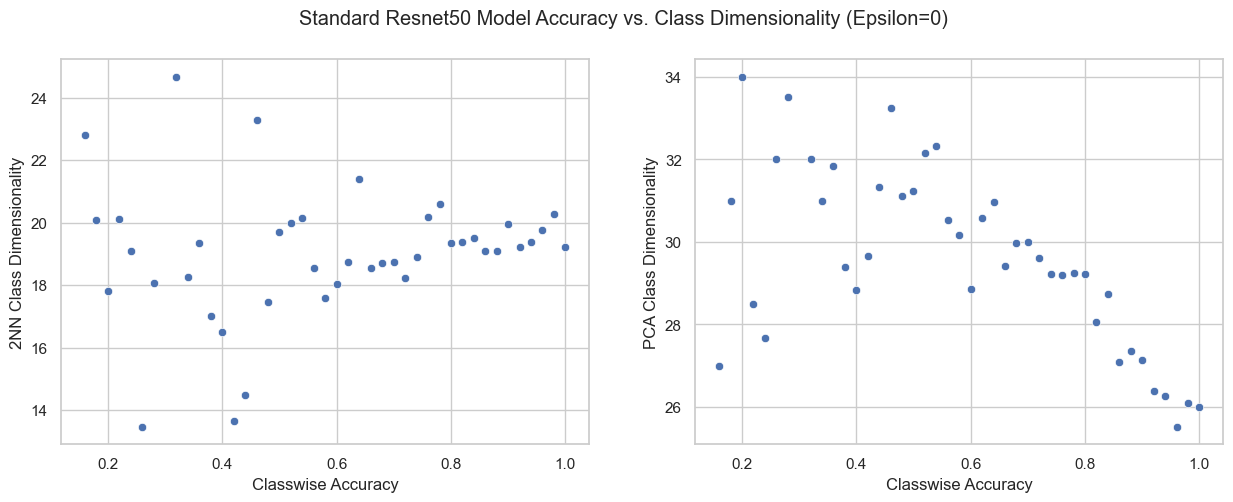

In [267]:
# two subplots for classwise accuracy e0 vs cam dims (one for 2nn and one for pca)
fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(processed_std_r50_e0, eps=0, model_name='Standard')

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")

plt.show()

Pearson Correlation Coefficient for 2NN: 0.159
Pearson Correlation Coefficient for PCA: -0.649


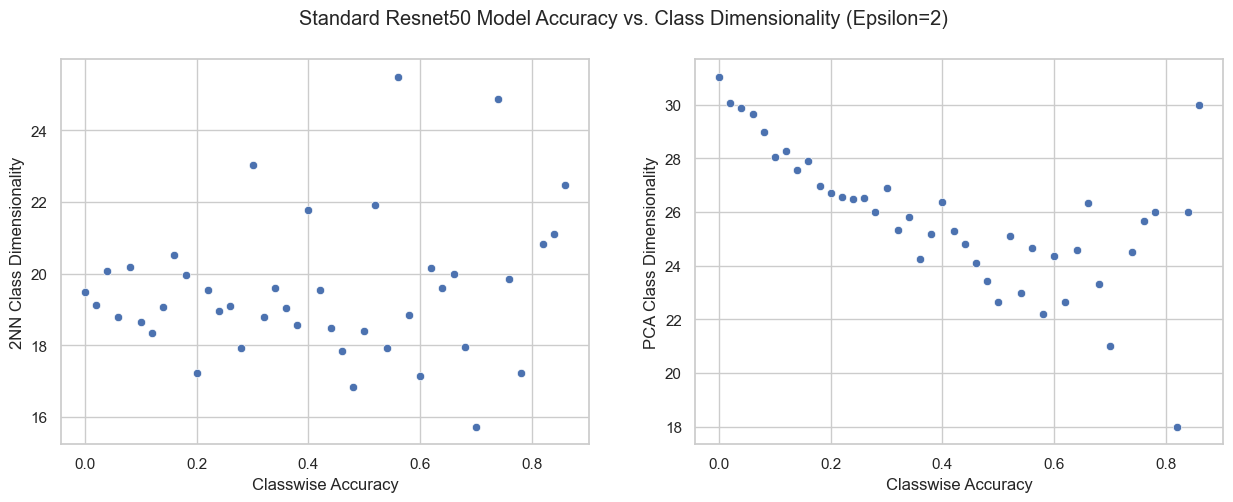

In [264]:
fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(processed_std_r50_e2, eps=2, model_name='Standard')

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")
plt.show()

Pearson Correlation Coefficient for 2NN: 0.075
Pearson Correlation Coefficient for PCA: -0.480


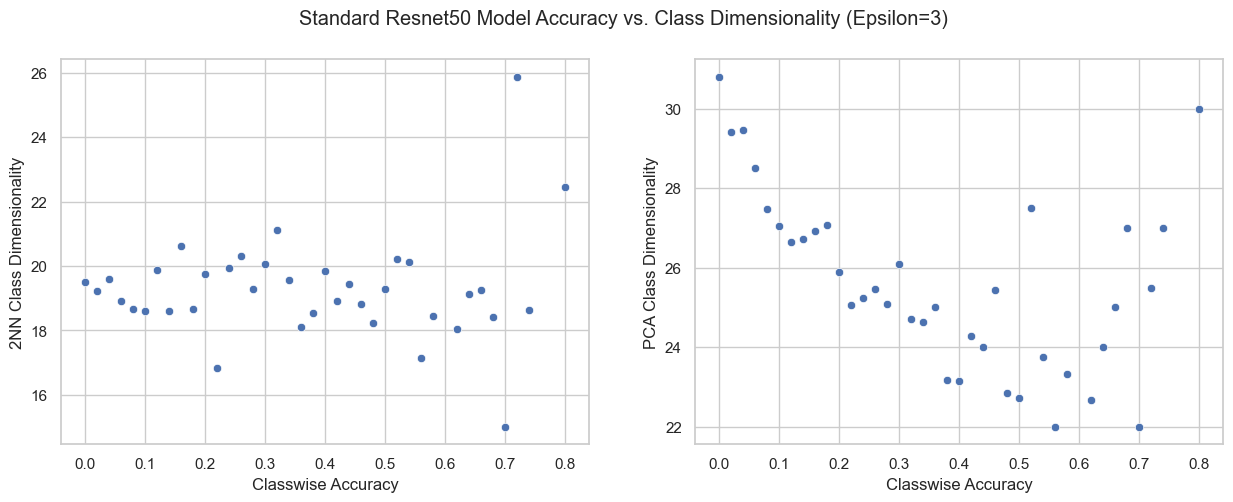

In [268]:
fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(processed_std_r50_e3, eps=3, model_name='Standard')

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")
plt.show()

### Adversarially Trained Model Plots

Pearson Correlation Coefficient for 2NN: -0.068
Pearson Correlation Coefficient for PCA: -0.258


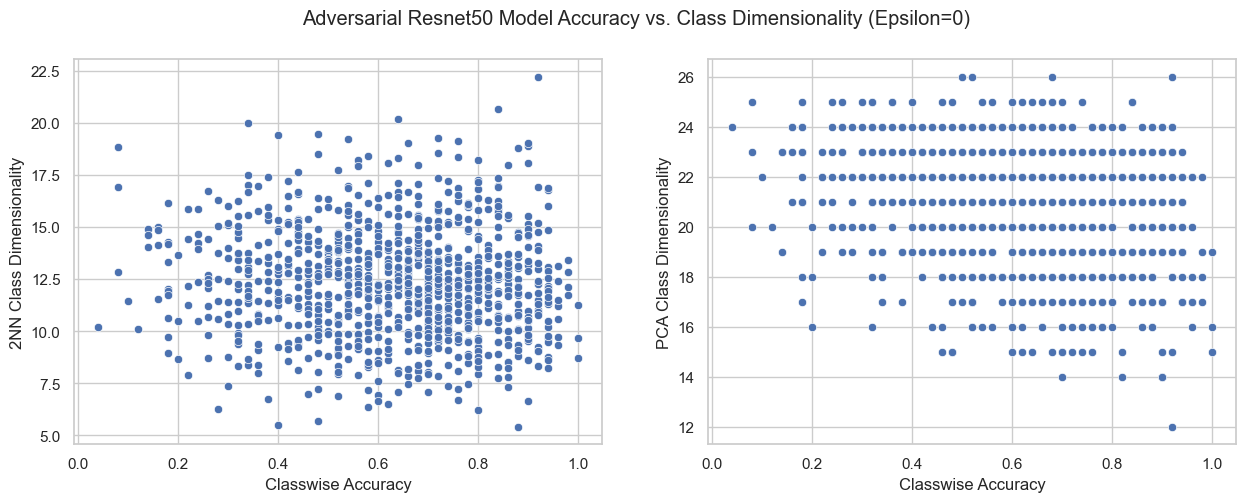

In [261]:
# e0 acc adv model
fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(adv_r50, eps=0, model_name='Adversarial')

# axs[0].set_yticks(np.arange(5, 45, 5))
# axs[1].set_yticks(np.arange(15, 40, 4))

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")

plt.show()

Pearson Correlation Coefficient for 2NN: -0.073
Pearson Correlation Coefficient for PCA: -0.202


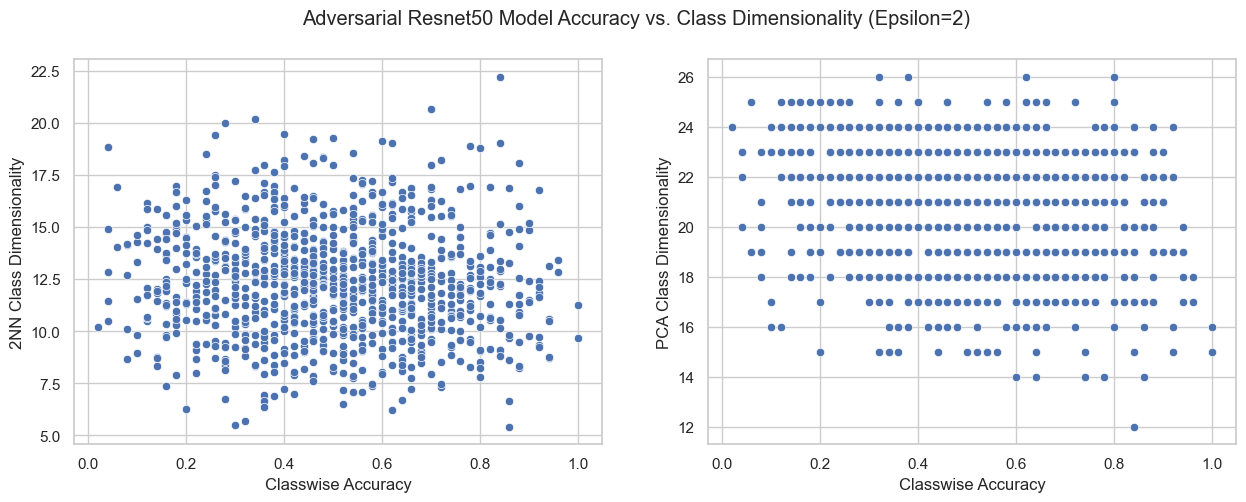

In [262]:
# e2 acc adv model
fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(adv_r50, eps=2, model_name='Adversarial')

# axs[0].set_yticks(np.arange(5, 45, 5))
# axs[1].set_yticks(np.arange(15, 40, 4))

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")

plt.show()


Pearson Correlation Coefficient for 2NN: -0.072
Pearson Correlation Coefficient for PCA: -0.161


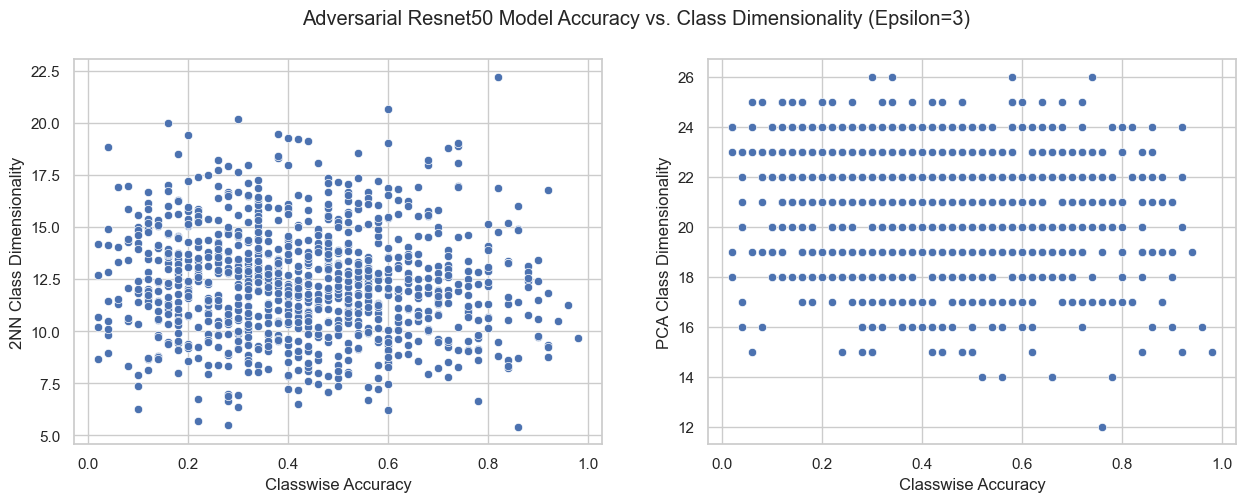

In [269]:
# e2 acc adv model
fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(adv_r50, eps=3, model_name='Adversarial')

# axs[0].set_yticks(np.arange(5, 45, 5))
# axs[1].set_yticks(np.arange(15, 40, 4))

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")

plt.show()


#### Averaging over cam dims again

In [270]:
processed_adv_r50 = adv_r50.copy()

# avg all class dims for same accuracy
processed_adv_r50_e0 = processed_adv_r50.groupby(['e0_acc']).mean().reset_index()
processed_adv_r50_e2 = processed_adv_r50.groupby(['e2_acc']).mean().reset_index()
processed_adv_r50_e3 = processed_adv_r50.groupby(['e3_acc']).mean().reset_index()


Pearson Correlation Coefficient for 2NN: -0.215
Pearson Correlation Coefficient for PCA: -0.692


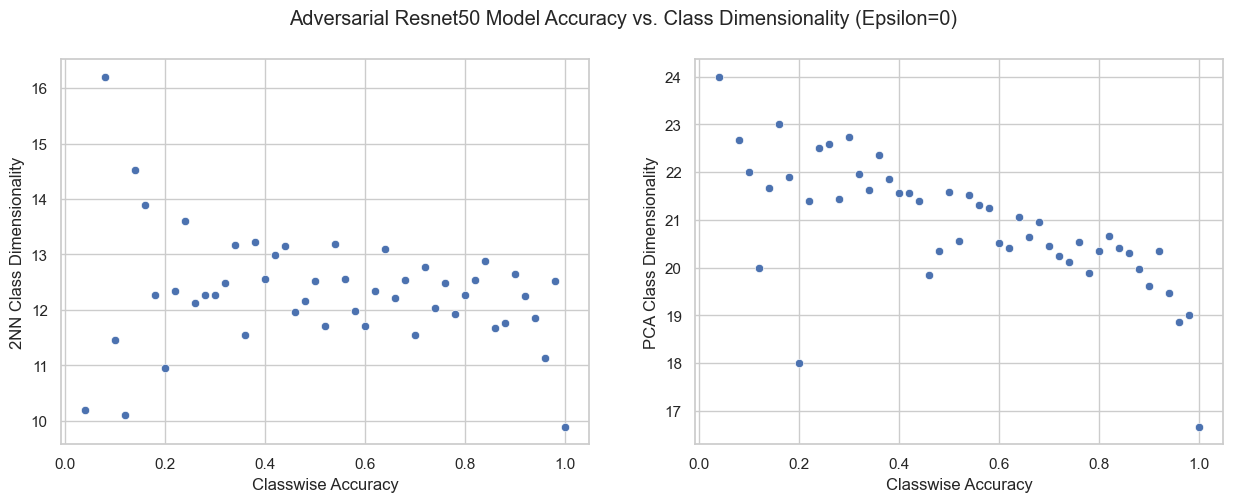

In [271]:
# e0

fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(processed_adv_r50_e0, eps=0, model_name='Adversarial')

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")


Pearson Correlation Coefficient for 2NN: -0.338
Pearson Correlation Coefficient for PCA: -0.708


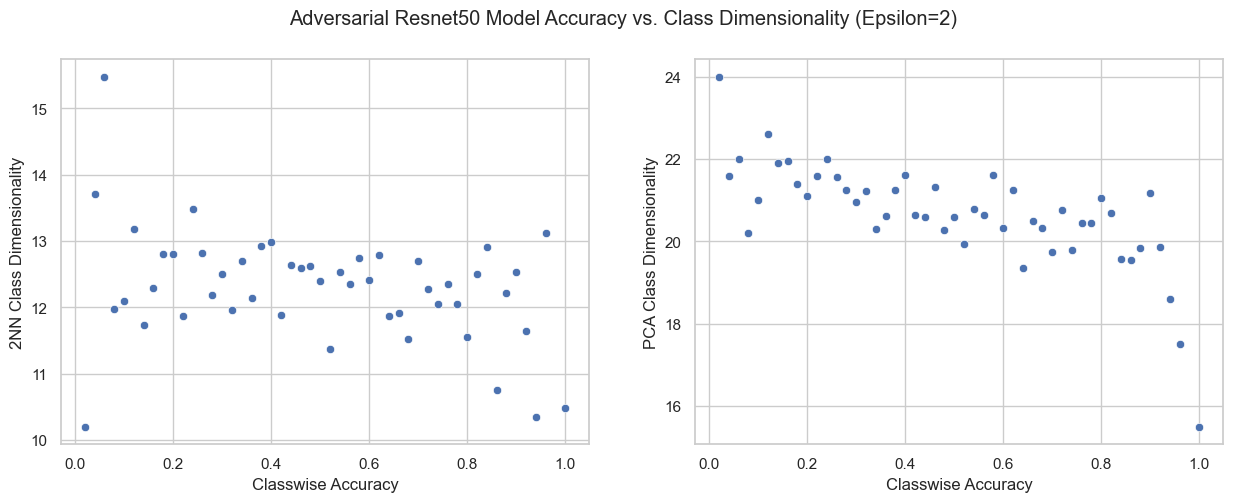

In [273]:
# e2

fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(processed_adv_r50_e2, eps=2, model_name='Adversarial')

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")


Pearson Correlation Coefficient for 2NN: -0.393
Pearson Correlation Coefficient for PCA: -0.640


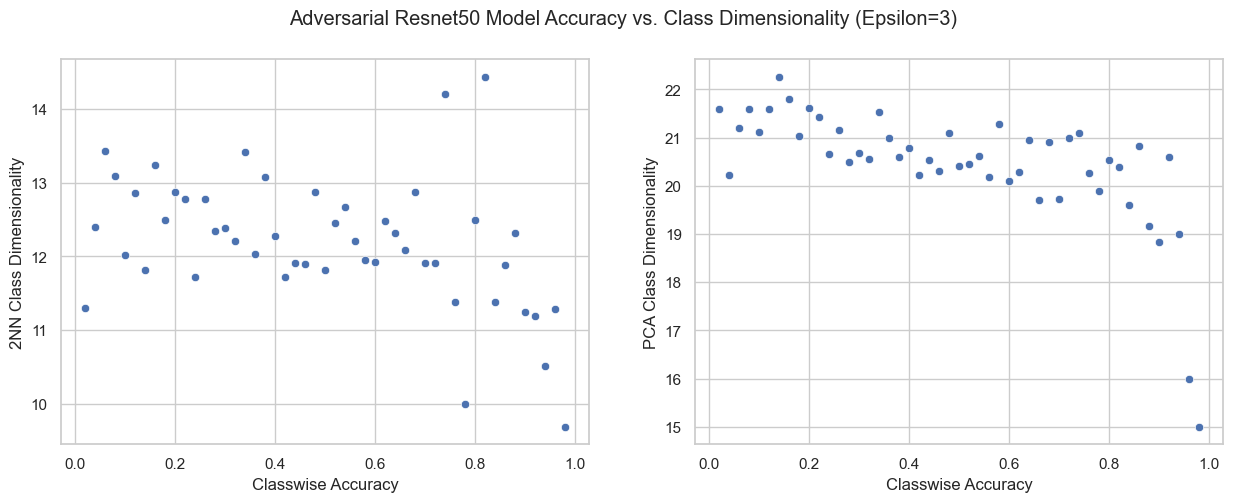

In [274]:
# e 3

fig, axs, pc_2nn, pc_pca = plot_acc_vs_dims_subplots(processed_adv_r50_e3, eps=3, model_name='Adversarial')

print(f"Pearson Correlation Coefficient for 2NN: {pc_2nn[0]:.3f}")
print(f"Pearson Correlation Coefficient for PCA: {pc_pca[0]:.3f}")
